# SI 618 - Homework #1: Data Manipulation

## Background

This homework assignment focuses on the analysis of historical data from the Olympic games.  The description of the data includes the following:
> This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. I scraped this data from www.sports-reference.com in May 2018.

Your main task in this assignment is to explore the data *using the data
manipulation methods we covered in class* as well as those in the assigned readings.  You may need to consult pandas documentation, Stack Overflow, or other online resources.  

** You should also feel free to ask questions on the class Slack channel! **

A total of 100 points is available in this homework assignment, consisting of:
- 80 points for completing the specific homework questions. More comprehensive 
answers will tend to gain more points.
- 10 points for the overall quality of spelling, grammar, punctuation, and style of written responses.  (see https://faculty.washington.edu/heagerty/Courses/b572/public/StrunkWhite.pdf for a detailed specifications).
- 10 points for creating code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines.  You should review those guidelines before proceding with the assignment.


## 0. Download the data from: 
- https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
- https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities (note: we suggest you use the [read_html](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html) function to load the data into a DataFrame.

In [1]:
MY_UNIQNAME = 'kaikang' # please fill in your uniqname

## 1. Answer the questions below. 
For each question, you should
1. Write code using Python and pandas that can help you answer the following questions, and
2. Explain your answers in plain English. You should use complete sentences that would be understood by an educated professional who is not necessarily a data scientist (like a product manager).

### 5 pt: Describe the dataset. 
- How many number rows and columns do you see in each data frame? 
- Are there any other interesting descriptive details?

In [174]:
# put your code here
import pandas as pd 
import numpy as np
df1 = pd.read_csv('athlete_events.csv', index_col = None)
df1.shape
#df1.columns
#df1.shape
#df1.describe()


(271116, 15)

In [167]:
df_noc = pd.read_csv('noc_regions.csv', index_col = None)
df_noc.shape

(230, 3)

In [158]:
html = 'https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities'
df2 = pd.read_html(html, header = 0, index_col = None)[1]
df2.shape
#df2.describe()

(69, 10)

After using dataframe.shape method, I got the number of columns and rows
In the dataframe (df1) created from "athletes_events.csv", there're 271116 rows × 15 columns;
In the dataframe (df_noc) created from "onc_regions.csv", there're 230 rows × 3 columns;
In the dataframe (df2) created from html about host cities, there're 69rows × 15 columns;

After using dataframe.columns, I got the name of all the features. For example, the columns of df1 includes 'ID', 'Name', 'Age', 'Sex', etc.
After using dataframe.describe() method, there are several interesting descriptive details.For athletes (df1), the count, mean, std, min, ..., max of ID, Age, Height ,etc. are displayed. For host cities (df2), I noticed the city (Innsbruck) and country (USA) with most frequency hosting Olympic Games.


### 5 pt: What is the overall ratio of female to male atheletes? 
There are multiple ways one could determine the meaning of "overall" here, and there isn't necessarily one correct answer. Based on your interpretation, give a justification for the choices you made in your analysis.

In [8]:
# put your code here
df_athelete = df1[['ID', 'Name', 'Sex']]
df_uniq = df_athelete.drop_duplicates(keep = "first")
df_uniq.Sex.value_counts()[1] / df_uniq.Sex.value_counts()[0]



0.33449158381730487


The ratio is around 0.33449.

I interpretated "overall" as the pool of all athletes attended Olympics Games (starting from the 1st game to the latest one). So the way I calculate the overal ratio of female to male atheletes is to first drop the duplicated atheletes records (only keep their first record) then divide the count of female atheletes by the count of male atheletes, the sumation of male and female atheletes is 135571. 

### 10 pt: Which athelete competed in most number of events? 
In which events did the athelete participate, and for what range of years? Which country did the athlete represent?

In [173]:
# put your code here
df1.Name.value_counts()
df1.ID.value_counts()
df1[df1.ID == 77710].Games.unique()
max(df1[df1.ID == 77710].Year) - min(df1[df1.ID == 77710].Year)



36

Robert Tait McKenzie (ID: 77710) has competed in most number of events

He participated in '1912 Summer', '1928 Summer', '1932 Summer', '1936 Summer', '1948 Summer', in the range of 36 years (from 1912-1948)
He represented CAN which is Canada. I used value_counts() to identify the athlete who competed in most number of events, then I filtered the unique games he/she completed and calculate the range of years.
  

### 10 pt: Which sport has the highest median athlete age? 
To determine this, you might want to plot the median age for each sport. You may want to sort the axes appropriately for your analysis.

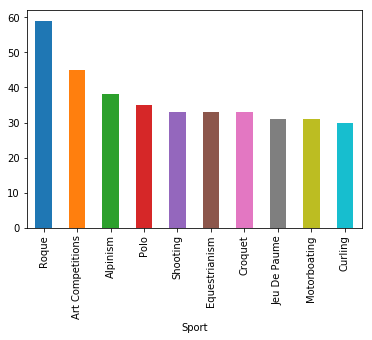

In [149]:
# put your code here
df1.groupby('Sport')['Age'].median().sort_values(ascending = False)\
    .head(10).plot.bar()


The Roque has the highest median athlete age which is 59.0

I used grouby method to group dataframe by sport, then index the 'Age' feature of each record, after that, I used median() and sort_values to calculate the median age of each sport and sort them in descending order.

### 10 pt: In which events has the Netherlands won the most medals?

In [163]:
# put your code here

df3 = df1.merge(df_noc, on = 'NOC')
df_MED = df3[(df3.Medal == 'Gold') 
     | (df3.Medal == 'Silver') | (df3.Medal == 'Bronze')]
df_MED[df_MED.Team == 'Netherlands'].Event.value_counts()[:5]


Hockey Women's Hockey                              128
Hockey Men's Hockey                                127
Swimming Women's 4 x 100 metres Freestyle Relay     55
Rowing Women's Coxed Eights                         45
Football Men's Football                             41
Name: Event, dtype: int64

Hockey Women's Hockey, 128 medals

First I merged the two dataframe created by csv files, so that the country name "Netherlands" could be used. Second, created a new dataframe (df_MED) with the records with 'Gold', 'Silver' or 'Bronze' medal. Then counted the number of each events the team 'Netherlands' participated and picked out the largest one.

### 10 pt: Which countries have more female medalists than male medalists?

In [165]:
# put your code here

df_medalist = df_MED[['ID', 'Name','Sex','region']]
df_indiv = df_medalist.drop_duplicates(keep = "first")

for region, record in df_indiv.groupby(['region']):
    dct = {}
    for gender, row in record.groupby('Sex'):
        dct[gender] = len(row)
    try:
        if dct['F'] > dct['M']:
            print(region)
    except:
        pass
        
    
         


        


Belarus
China
Peru
Ukraine


Belarus, China, Peru, Ukraine

In order to drop dulicated records of the same athelete (an athelete could be counted as medalist as long as he/she got one medal in one game), I created a new dataframe (df_medalist) including the 'ID', 'Name', 'Sex', 'region' fields from the df_MED, then used drop_duplicates method to keep only one record of each medalist. Then 

### 10 pt: Which country won the most medal points in each of the 2016 Summer Olympics?
Rank each country by a score, where 3 points are assigned for a gold medal, 2 points for silver, and 1 point for bronze.

In [166]:
# put your code here
df_2016 = df_MED[df_MED.Games == "2016 Summer"]
lst_score = []
for c, record in df_2016.groupby("region"):
    shp_g = df_2016[(df_2016.region == c) & (df_2016.Medal == 'Gold')].shape
    shp_s = df_2016[(df_2016.region == c) & (df_2016.Medal == 'Silver')].shape
    shp_b = df_2016[(df_2016.region == c) & (df_2016.Medal == 'Bronze')].shape
    score = shp_g[0] * 3 + shp_s[0] * 2 + shp_b[0]
    lst_score.append((c, score))
print(sorted(lst_score, key = lambda x: x[1], reverse = True)[0])
    
    


('USA', 596)


USA won the most medal points: 596

The solution used the df_MED (which contains all the model records) indexed by "2016 Summer". First grouped the dataframe by region, for each region (country), counted the number of gold, silver and bronze medals, then calculated the medal points beforing appeding the tuple with country name and score to the list of countries with score. Last step: sort the list by the descending order and print out the first tuple in the list.

### 20 pt: For each year in which games were held, what proportion of gold medals did the host country win? 
You will need to combine multiple datasets to complete the analysis.  

In [171]:
# put your code here
df2.at[6, 'City'] = 'Antwerpen'
df2.at[2, 'City'] = 'St. Louis'
df2.at[24, 'City'] = 'Melbourne'
df2.at[24, 'Country'] = 'Australia'
df2['Country'].replace(to_replace = ['United Kingdom'],
    value = 'UK', inplace = True)
df2['Country'].replace(to_replace = ['United States'],
    value = 'USA', inplace = True)
dflarge = df2.merge(df3, on = 'City')




In [172]:
for year, rec in dflarge.groupby("Year_y"):
    g_sum = dflarge[(dflarge.Year_y == year) 
         & (dflarge.Medal == 'Gold')].shape[0]
    host = rec.Country.unique()[0]
    g_host = rec[(rec.region == host) 
         & (rec.Medal == 'Gold')].shape[0]
    print(year)
    print("Host: {}".format(host))
    print("Proportion: {}%\n".format(round(g_host / g_sum * 100, 1)))
    
    



1900
Host: France
Proportion: 25.9%

1904
Host: USA
Proportion: 74.0%

1908
Host: UK
Proportion: 50.0%

1912
Host: Sweden
Proportion: 31.6%

1920
Host: Belgium
Proportion: 11.6%

1924
Host: France
Proportion: 12.5%

1928
Host: Netherlands
Proportion: 8.2%

1932
Host: USA
Proportion: 35.0%

1936
Host: Germany
Proportion: 28.8%

1948
Host: UK
Proportion: 2.4%

1952
Host: Norway
Proportion: 3.4%

1956
Host: Sweden
Proportion: 4.5%

1960
Host: USA
Proportion: 38.0%

1964
Host: Austria
Proportion: 1.7%

1968
Host: France
Proportion: 3.8%

1972
Host: Japan
Proportion: 6.3%

1976
Host: Austria
Proportion: 0.9%

1980
Host: USA
Proportion: 33.3%

1984
Host: USA
Proportion: 35.9%

1988
Host: Canada
Proportion: 0.7%

1992
Host: France
Proportion: 2.1%

1994
Host: Norway
Proportion: 7.3%

1996
Host: USA
Proportion: 26.2%

1998
Host: Japan
Proportion: 5.5%

2000
Host: Australia
Proportion: 9.0%

2002
Host: USA
Proportion: 6.8%

2008
Host: China
Proportion: 11.0%

2010
Host: Canada
Proportion: 38.5%

The first step is to merge the three dataframe as a large one called dflarge. But before that, some value need to be fixed, for example, 'UK' - 'United Kingdom' and 'USA' - 'United States', the name of countries have to be identical in both dataframes merged. After fixing values, I merged all the dataframe as a large one, then grouped it by year, then looped thru the year, for each year, retrieved the host country, counted the number of total gold medals and the numebr of gold medals won by the host country beforing calculating the requested proportion. Then printed the year, host country and proportion out.

## Please submit your completed notebook in .IPYNB and .HTML formats via Canvas